# Alineamientos

Funcion para crear el dotplot.
(DUDA: EN EL GRAFICO DE LA CLASE SE VEÍA DIFERENTE CON UN EJEMPLO... CONSULTAR)

In [240]:
import numpy as np
import matplotlib.pyplot as plt
def show_dotplot(dotplot):
    plt.imshow(dotplot, cmap="gray_r", interpolation='nearest')
    plt.title(f'Dotplot: {len(seq1)} bases vs {len(seq2)} bases')
    plt.xticks(ticks=np.arange(len(seq2)), labels=np.arange(len(seq2)))
    plt.yticks(ticks=np.arange(len(seq1)), labels=np.arange(len(seq1)))
    
    plt.xlabel("Secuencia 2")
    plt.ylabel("Secuencia 1")
    plt.show()
    
def make_dotplot(seq1,seq2):
    dotplot = np.zeros((len(seq1),len(seq2)))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i]==seq2[j]:
                dotplot[i,j]=1
    return dotplot

Funcion para filtrar el dotplot

In [190]:
def has_potential(subdotplot):
    score = 0
    for i in range(len(subdotplot)):
        if subdotplot[i,i] == 1:
            score += 1

    if score > (len(subdotplot)/2):
        return True
    return False

def filtered_dotplot(dotplot, k):
    rows, cols = len(dotplot), len(dotplot[0])
    f_dotplot = np.zeros((rows, cols))

    i,j=-1,-1
    
    while i < (rows - k) or j < (cols - k):
        if i<rows-k:
            i+=1
        if j<cols-k:
            j+=1
        subdotplot = dotplot[i:i+k, j:j+k]
        if has_potential(subdotplot):
            f_dotplot[i:i+k, j:j+k] = dotplot[i:i+k, j:j+k] * np.eye(k)



    return f_dotplot
            

Funcion para encontrar el mejor alineamiento posible... (una especie de greedy, hecho rapido, tiene muchos 'huecos')

In [146]:
def obtain_best_alignment(dotplot):
    complete = False
    alignment_list = []
    i = 0
    j = 0
    while not complete:
        if i >= len(dotplot) or j >= len(dotplot[0]):
            complete = True
        else:
            alignment_list.append([i, j])
            if i + 1 < len(dotplot) and j + 1 < len(dotplot[0]) and dotplot[i + 1, j + 1] == 1:
                i += 1
                j += 1
            else:
                j += 1
    return alignment_list


Traduccion de la lista de alineamientos a una sintaxis mas amigable

In [9]:
def traduce_alignment(alignment_list, seq1, seq2):
    traduced_seq = ''
    for i in range(len(alignment_list)):
        if seq1[alignment_list[i][0]] == seq2[alignment_list[i][1]]:
                traduced_seq += f"{seq1[alignment_list[i][0]]}{i}"
        else:
            # traduced_seq += f"{seq1[alignment_list[i-1][0]]}"
            # Si se prefiere un guion en vez de repetir la ultima base:
            traduced_seq += "-"
    return traduced_seq
    

Funcion de alineamiento de secuencias

In [52]:
from Bio import SeqIO

def read_fasta(filename):
    with open(filename,'r') as handle:
        r_seq = list(SeqIO.parse(handle, 'fasta'))
        return r_seq[0].seq, r_seq[1].seq

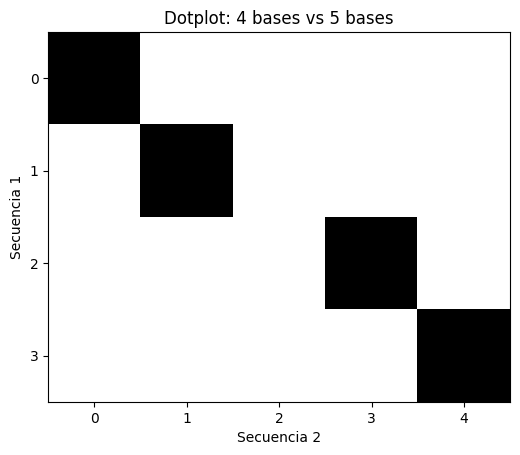

In [241]:
def alignment(seq1, seq2):
    dotplot = make_dotplot(seq1,seq2)
    dotplot = filtered_dotplot(dotplot, 3)
    show_dotplot(dotplot)
    best_alignment = obtain_best_alignment(dotplot)
    traduced_alignment = traduce_alignment(best_alignment, seq1, seq2)
    return dotplot

# file = "./documents/TP53.fna"
# seq1, seq2 = read_fasta(file) 
seq1 = 'TACG'
seq2 = 'TATCG'

align = alignment(seq1, seq2)

In [236]:
print(align)

None


Función de alineamiento de biopython

In [200]:
from Bio import pairwise2

# Realizar el alineamiento
alignments = pairwise2.align.globalxx(seq1, seq2)

# Imprimir los alineamientos
for alignment in alignments:
    print(pairwise2.format_alignment(*alignment))

CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAGTCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGGGGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGTTGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCTAGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGTGCTGGGCGTAGGGAATCCCTGAAATAAAAGATGCACAAAGCATTGAGGTCTGAGACTTTTGGATCTCGAAACATTGAGAACTCATAGCTGTATATTTTAGAGCCCATGGCATCCTAGTGAAAACTGGGGCTCCATTCCGAAATGATCATTTGGGGGTGATCCGGGGAGCCCAAGCTGCTAAGGTCCCACAACTTCCGGACCTTTGTCCTTCCTGGAGCGATCTTTCCAGGCAGCCCCCGGCTCCGCTAGATGGAGAAAATCCAATTGAAGGCTGTCAGTCGTGGAAGTGAGAAGTGCTAAACCAGGGGTTTGCCCGCCAGGCCGAGGAGGACCGTCGCAATCTGAGAGGCCCGGCAGCCCTGTTATTGTTTGGCTCCACATTTACATTTCTGCCTCTTGCAGCAGCATTTCCGGTTTCTTTTTGCCGGAGCAGCTCACTATTCACCCGATGAGAGGGGAGGAGAGAGAGAGAAAATGTCCTTTAGGCCGGTTCCTCTTACTTGGCAGAGGGAGGCTGCTATTCTCCGCCTGCATTTCTTTTTCTGGATTACTTAGTTATGGCCTTTGCAAAGGCAGGGGT

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

